In [51]:
# Step 1: Import and Clean data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [55]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [56]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [57]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [58]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [59]:
# Step 2: Fit a K Means Model with any Number of Clusters

In [60]:
kmeans = KMeans(n_clusters = 2
                , random_state = 42).fit(X_scaled)

In [61]:
# Step 3: Pick two features to visualize across

In [62]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

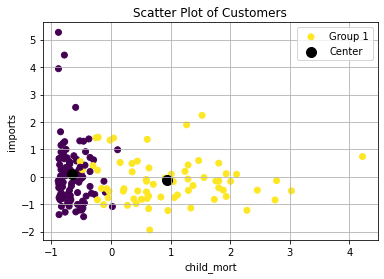

In [63]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

In [64]:
# Step 4: Check a range of k-clusters and visualize to find the elbow. 
# Test 30 different random starting places for the centroid means

In [65]:
# As seen in Professor Borghese's slides

WCSSs = []
Ks = range(1, 20)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init="random")
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [66]:
# Step 5: Use the above work and economic critical thinking to choose a number of clusters. 
# Explain why you chose the number of clusters and fit a model accordingly.

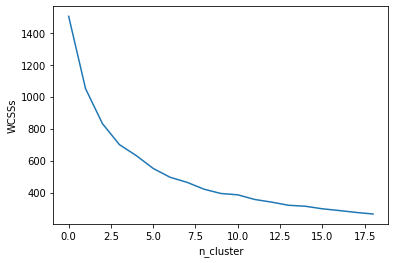

In [67]:
plt.plot(WCSSs)
plt.xlabel("n_cluster")
plt.ylabel("WCSSs")
plt.show()

In [68]:
# Analysis: I am choosing the cluster of approximately 3 as it seems to be a very vague elbow

In [69]:
# Step 6: Create a list of the countries that are in each cluster. 
# Write interesting things you notice. Hint : Use .predict(method)

In [83]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=30, init="random").fit(X_scaled)
kmeans

KMeans(init='random', n_clusters=3, n_init=30)

In [84]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
output = pd.concat([preds, X, names], axis=1)

In [85]:
print("Cluster1:")
list(output[output[0]==0]["country"])

Cluster1:


['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [86]:
print("Cluster2:")
list(output[output[0]==1]["country"])

Cluster2:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [87]:
print("Cluster3:")
list(output[output[0]==2]["country"])

Cluster3:


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [88]:
# Step 7: Create a table of Descriptive Statistics. 
# Rows being the Cluster number and columns being all the features. 
# Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [89]:
stat = pd.concat([preds, X], axis = 1)
stat.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


In [ ]:
# Step 8: Write an observation about the descriptive statistics.

Based on the descriptive statistics above, I predict the way the clusters formed were based on the wealth of the countries. Perhaps cluster 3 is an underdeveloped country, in comparison to cluster 1 which is highly developed. For example, the GDP of cluster 1 is almost 22 times bigger than cluster 3's GDP.

In [ ]:
# Thank you